Importing the Dependencies

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and Processing

In [2]:
# Loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('NAAA.csv')

In [3]:
# inspecting the first 5 rows of the dataframe
car_dataset.head()

,Sale Price,Mileage,Sale Type,Exterior Color,Interior Color,Vehicle Trim,Vehicle ID,Model Year,Make,Model,...,Segment,Drivetrain,Fuel Type,Transmission,Cylinders,Displacement,Base MSRP,Retail Equipped MSRP,Turbocharged,Supercharged
0,8305,115318,F,BLACK,TAN,XLE,2012900351,2012,Toyota,Camry,...,Mid-Size Car,FWD,Gas,A,6.0,3.5,26910,28341,NaN,NaN
1,26200,54272,F,GREY,BLK,XLE,2021900270,2021,Toyota,Avalon,...,Full-Size Car,FWD,Gas,A,6.0,3.5,35975,38355,NaN,NaN
2,33500,38788,F,NaN,NaN,T/A 392,2018240238,2018,Dodge,Challenger,...,Sporty Car,RWD,Gas,M,8.0,6.4,38995,45275,NaN,NaN
3,15500,49278,D,WHITE,BLA,EQUIN LT,2018160724,2018,Chevrolet,Equinox,...,Compact Crossover/SUV,FWD,Gas,A,4.0,2.0,29150,32040,Turbocharg,NaN
4,20000,34259,D,BLACK,BLK,SE,2019380088,2019,Hyundai,Tucson,...,Compact Crossover/SUV,FWD,Gas,A,4.0,2.0,23200,25000,NaN,NaN


In [4]:
# replace space with _
car_dataset.columns = car_dataset.columns.str.replace(' ', '_')

In [5]:
# inspecting the first 5 rows of the dataframe
car_dataset.head()

,Sale_Price,Mileage,Sale_Type,Exterior_Color,Interior_Color,Vehicle_Trim,Vehicle_ID,Model_Year,Make,Model,...,Segment,Drivetrain,Fuel_Type,Transmission,Cylinders,Displacement,Base_MSRP,Retail_Equipped_MSRP,Turbocharged,Supercharged
0,8305,115318,F,BLACK,TAN,XLE,2012900351,2012,Toyota,Camry,...,Mid-Size Car,FWD,Gas,A,6.0,3.5,26910,28341,NaN,NaN
1,26200,54272,F,GREY,BLK,XLE,2021900270,2021,Toyota,Avalon,...,Full-Size Car,FWD,Gas,A,6.0,3.5,35975,38355,NaN,NaN
2,33500,38788,F,NaN,NaN,T/A 392,2018240238,2018,Dodge,Challenger,...,Sporty Car,RWD,Gas,M,8.0,6.4,38995,45275,NaN,NaN
3,15500,49278,D,WHITE,BLA,EQUIN LT,2018160724,2018,Chevrolet,Equinox,...,Compact Crossover/SUV,FWD,Gas,A,4.0,2.0,29150,32040,Turbocharg,NaN
4,20000,34259,D,BLACK,BLK,SE,2019380088,2019,Hyundai,Tucson,...,Compact Crossover/SUV,FWD,Gas,A,4.0,2.0,23200,25000,NaN,NaN


In [6]:
# checking the number of rows and columns
car_dataset.shape

(10145691, 22)

In [7]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10145691 entries, 0 to 10145690
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Sale_Price            int64  
 1   Mileage               int64  
 2   Sale_Type             object 
 3   Exterior_Color        object 
 4   Interior_Color        object 
 5   Vehicle_Trim          object 
 6   Vehicle_ID            int64  
 7   Model_Year            int64  
 8   Make                  object 
 9   Model                 object 
 10  Series                object 
 11  Style                 object 
 12  Segment               object 
 13  Drivetrain            object 
 14  Fuel_Type             object 
 15  Transmission          object 
 16  Cylinders             float64
 17  Displacement          float64
 18  Base_MSRP             int64  
 19  Retail_Equipped_MSRP  int64  
 20  Turbocharged          object 
 21  Supercharged          object 
dtypes: float64(2), int64(6), object(14)
memo

In [8]:
# checking the number of missing values
car_dataset.isnull().sum()

Sale_Price                     0
Mileage                        0
Sale_Type                      0
Exterior_Color           4698443
Interior_Color           5212132
Vehicle_Trim             3413501
Vehicle_ID                     0
Model_Year                     0
Make                           0
Model                          0
Series                    278190
Style                          0
Segment                        0
Drivetrain                     2
Fuel_Type                      0
Transmission              272526
Cylinders                  10101
Displacement                   0
Base_MSRP                      0
Retail_Equipped_MSRP           0
Turbocharged             7961562
Supercharged            10061053
dtype: int64

In [9]:
# fill missing values with E(Assuming it's electric)
car_dataset['Transmission'].fillna('E', inplace=True)

C:\Users\ChenChen\AppData\Local\Temp\ipykernel_32176\1059181825.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_dataset['Transmission'].fillna('E', inplace=True)


In [10]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())

Fuel_Type
Gas               8740452
Flex               772662
Diesel             270344
Hybrid             208847
Electric           109616
Plug-in Hybrid      20205
PHEV                18406
Hydrogen             1590
CNG                  1505
LPG                   939
Hyb                   579
Hyb/Elec              276
Ethanol                89
LPG/Gas                61
Hybrd                  49
CNG/Gas                45
Elect                  17
GFP                     4
MHEV                    3
CNG/GAS                 2
Name: count, dtype: int64


In [11]:
print(car_dataset.Seller_Type.value_counts())

AttributeError: 'DataFrame' object has no attribute 'Seller_Type'

In [ ]:
print(car_dataset.Transmission.value_counts())

Transmission
A    9361462
M     511703
E     272526
Name: count, dtype: int64


Encoding the Categorical Data

In [ ]:
# encoding "Fuel_Type" Column
car_dataset = car_dataset.replace({'Fuel_Type':{'Gas':0, 'Flex':1, 'Diesel':2,'Hybrid':3, 'Electric':4, 'Plug-in Hybrid':5, 'PHEV':6, 'Hydrogen':7, 
                                  'CNG':8, 'LPG':9, 'Hyb':10, 'Hyb/Elec':11, 'Ethanol':12, 'LPG/Gas':13, 'Hybrd':14, 'CNG/Gas':15, 'Elect':16,
                                   'GFP':17, 'MHEV':18, 'CNG/GAS':19}}).infer_objects(copy=False)

# encoding "Seller_Type" Column
car_dataset = car_dataset.replace({'Seller_Type':{'D':0, 'F':1, 'U':2,'M':3, 'R':4, 'S':5, 'A':6}}).infer_objects(copy=False)

# encoding "Transmission" Column
car_dataset = car_dataset.replace({'Transmission':{'A':0, 'M':1, 'E':2}}).infer_objects(copy=False)

In [ ]:
car_dataset.head()

,Sold_Price,Mileage,Seller_Type,Model_Year,Car_Name,Fuel_Type,Transmission,Present_Price
0,8305,115318,1,2012,Camry,0,0,26910
1,26200,54272,1,2021,Avalon,0,0,35975
2,33500,38788,1,2018,Challenger,0,1,38995
3,15500,49278,0,2018,Equinox,0,0,29150
4,20000,34259,0,2019,Tucson,0,0,23200


Splitting the data and target

In [ ]:
X = car_dataset.drop(['Car_Name','Sold_Price'], axis = 1)
Y = car_dataset['Sold_Price']

In [ ]:
print(X)

          Mileage  Seller_Type  Model_Year  Fuel_Type  Transmission  \
0          115318            1        2012          0             0   
1           54272            1        2021          0             0   
2           38788            1        2018          0             1   
3           49278            0        2018          0             0   
4           34259            0        2019          0             0   
...           ...          ...         ...        ...           ...   
10145686    97223            0        2018          2             0   
10145687   177614            0        2015          0             0   
10145688    16792            1        2022          0             0   
10145689   103097            1        2016          1             0   
10145690   267910            0        2003          0             1   

          Present_Price  
0                 26910  
1                 35975  
2                 38995  
3                 29150  
4                

In [ ]:
print(Y)

0            8305
1           26200
2           33500
3           15500
4           20000
            ...  
10145686    27500
10145687     4500
10145688     5900
10145689    26000
10145690     5000
Name: Sold_Price, Length: 10145691, dtype: int64


Splitting the data into Training data and Test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.01, random_state= 42)

Model Training

    1. Linear Regression

In [ ]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [ ]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [ ]:
# prediction on Trianing data
training_data_prediction = lin_reg_model.predict(X_train)

In [ ]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R Squared Error : ", error_score)

R Squared Error :  0.7067634729846538


Visualize the actual prices and Predicted prices

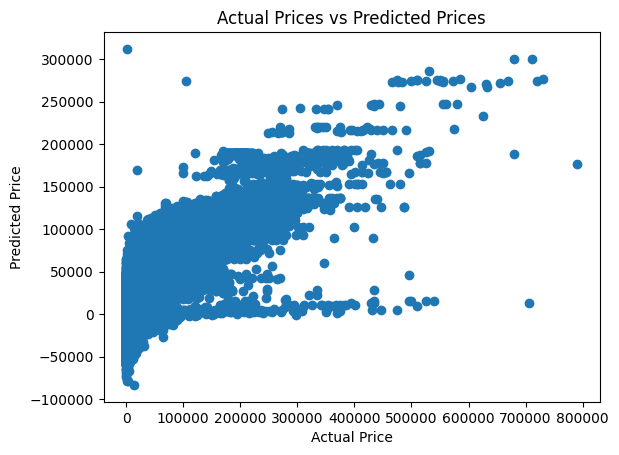

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
# prediction on Training data
test_data_prediction = lin_reg_model.predict(X_test)

In [ ]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R Squared Error : ", error_score)

R Squared Error :  0.7056845568741037


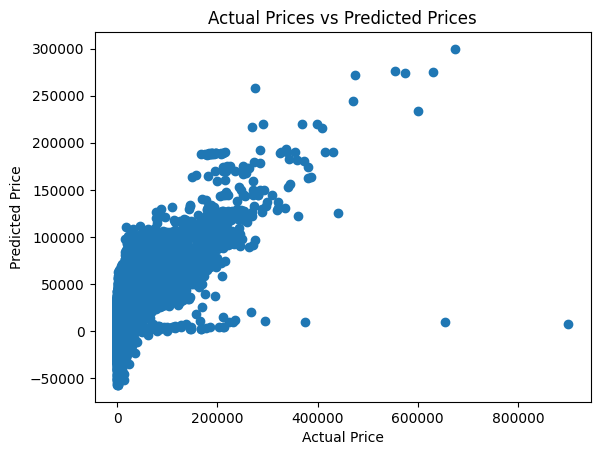

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

2. Lasso Regression

In [ ]:
# loading the linear regression model
lass_reg_model = Lasso()

In [ ]:
lass_reg_model.fit(X_train, Y_train)

Lasso()

Model Evaluation

In [ ]:
# prediction on Trianing data
training_data_prediction = lass_reg_model.predict(X_train)

In [ ]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R Squared Error : ", error_score)

R Squared Error :  0.7067634224833647


Visualize the actual prices and Predicted prices

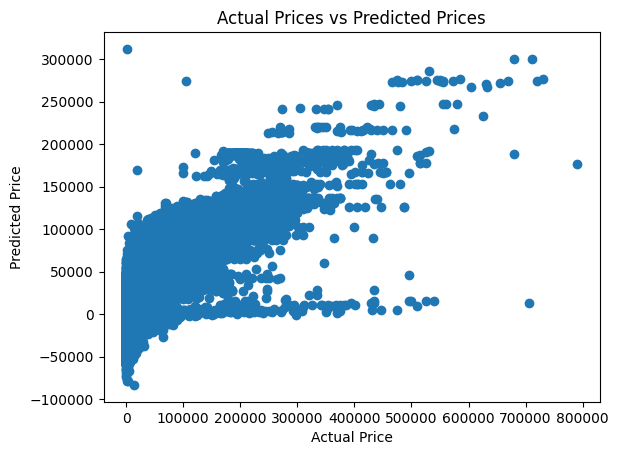

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
# prediction on Training data
test_data_prediction = lass_reg_model.predict(X_test)

In [ ]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R Squared Error : ", error_score)

R Squared Error :  0.7056846634045671


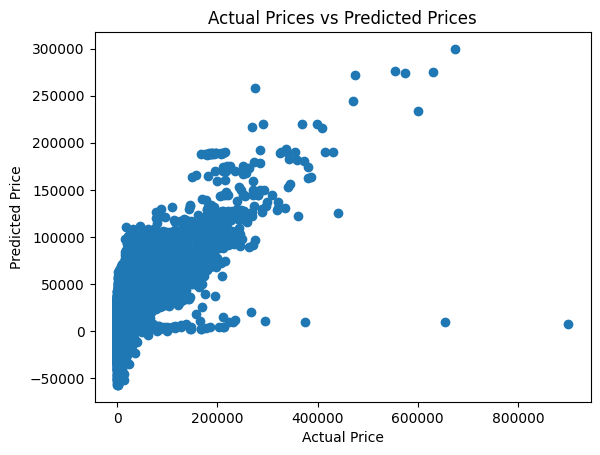

: 

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()